In [95]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Utilizamos la biblioteca **`pyarrow`** para importar parquet desde pandas

In [ ]:
pip install pyarrow

## **`user_items`**

In [104]:
user_items = pd.read_parquet('user_items', engine='pyarrow')
user_items

,user_id,item_id,title,playtime_forever,playtime_2weeks
0,76561197970982479,10,Counter-Strike,6,0
1,76561197970982479,20,Team Fortress Classic,0,0
2,76561197970982479,30,Day of Defeat,7,0
3,76561197970982479,40,Deathmatch Classic,0,0
4,76561197970982479,50,Half-Life: Opposing Force,0,0
...,...,...,...,...,...
5094100,76561198329548331,346330,BrainBread 2,0,0
5094101,76561198329548331,373330,All Is Dust,0,0
5094102,76561198329548331,388490,One Way To Die: Steam Edition,3,3
5094103,76561198329548331,521570,You Have 10 Seconds 2,4,4


Buscamos outliers en la columna `playtime_forever`

In [97]:
user_items.describe()

,item_id,playtime_forever,playtime_2weeks
count,5.094105e+06,5.094105e+06,5.094105e+06
mean,1.783916e+05,9.905511e+02,9.069004e+00
std,1.318516e+05,5.414297e+03,1.403145e+02
min,1.000000e+01,0.000000e+00,0.000000e+00
25%,3.445000e+04,0.000000e+00,0.000000e+00
50%,2.144200e+05,3.400000e+01,0.000000e+00
75%,2.664300e+05,3.550000e+02,0.000000e+00
max,5.307200e+05,6.427730e+05,1.996700e+04


Hacemos un diagrama de caja

(0.0, 4000.0)

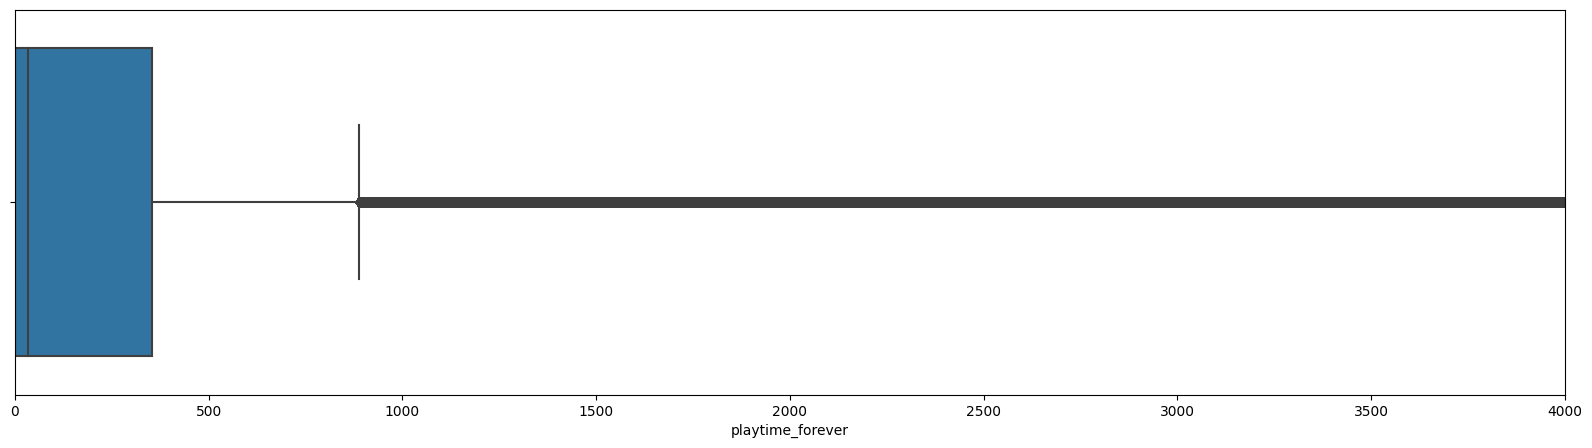

In [98]:
plt.figure(figsize = (20,5))
sns.boxplot(x=user_items.playtime_forever)
plt.xlim(0,4000)